# ML Project


## Overview


### Keras

<p>
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:
<ul>
    <li>
        Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
    </li>
    <li>
        Supports both convolutional networks and recurrent networks, as well as combinations of the two.
    </li>
    <li>
        Runs seamlessly on CPU and GPU.
    </li>
</ul>
</p>

<p>
    <h3>Guiding principles</h3>
<ul>
    <li>
        <b>User friendliness</b>. Keras is an API designed for human beings, not machines. It puts user experience front and center. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.
    </li>
    <li>
      <b>Modularity</b>. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.
</li><li>
    <b>Easy extensibility</b>. New modules are simple to add (as new classes and functions), and existing modules provide ample examples. To be able to easily create new modules allows for total expressiveness, making Keras suitable for advanced research.
</li><li>
    <b>Work with Python</b>. No separate models configuration files in a declarative format. Models are described in Python code, which is compact, easier to debug, and allows for ease of extensibility.
</li></ul>
</p>

### Tensorflow

<p>TensorFlow™ is an open source software library for <b>high performance numerical computation</b>. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.</p>


In [221]:
import tensorflow as tf

#If the data isn't already in keras/datasets it will download automatically 
# fashion_mnist = tf.keras.datasets.fashion_mnist
# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


#lets load the dataset manually
import numpy as np
def load_mnist_data(images_path, labels_path):
    with open(images_path, 'rb') as img_file, open(labels_path, 'rb') as lbl_file:
        images = np.frombuffer(img_file.read(), np.uint8, offset=16).reshape(-1, 28, 28)
        labels = np.frombuffer(lbl_file.read(), np.uint8, offset=8)
    return images, labels

dataset_dir = '/Users/sh/dev/datasets/fashion_mnist'

X_train, y_train = load_mnist_data(f"{dataset_dir}/train-images-idx3-ubyte",f"{dataset_dir}/train-labels-idx1-ubyte")
X_test, y_test = load_mnist_data(f"{dataset_dir}/t10k-images-idx3-ubyte",f"{dataset_dir}/t10k-labels-idx1-ubyte")




In [222]:
# normalize

# X_train = X_train.astype('float32')/255.0
# X_test = X_test.astype('float32')/255.0

In [223]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [224]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Label: 6
Class: Shirt


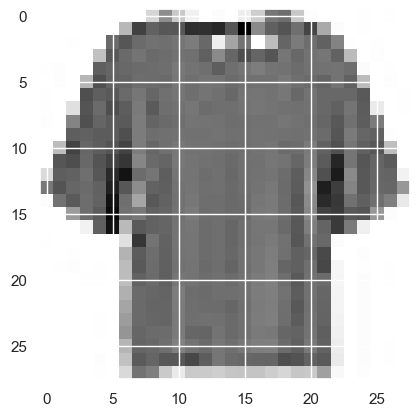

In [225]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_index = 77
print('Label:', y_train[image_index])
print("Class:", class_names[y_train[image_index]])
plt.imshow(X_train[image_index], cmap='Greys')
plt.show()


In [226]:
# one hot encoding
# We will use the Keras utility to_categorical to one hot encode the labels

from tensorflow.keras.utils import to_categorical
# help(to_categorical)
y_train = to_categorical(y_train)

#This is the label corresponding to index 77, the shirt
y_train[77]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Model 1: Building with Dense Neural Network (DNN) in GridSearch

### Grid Search CV

<p>One of the easiest improvements to make is to find a good ratio between batch size and epochs. <br><br>
The <b>batch size</b> is the number of training examples that contribute to each parameter update <br><br>
<b>Epochs</b> refers to the number of iterations over the entire (training) dataset<br><br>
    <hr>
Rather than guess and check over and over, we can employ a grid search in which an exhaustive search happen over specified parameter values for an estimator.

More on GridSearch can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

<p>
    Keras provides a wide variety of <a href="https://keras.io/activations/" target=_blank>Activation Functions</a>, <a href="https://keras.io/losses/" target=_blank>Losses</a>, 
<a href="https://keras.io/metrics/" target=_blank>Metrics</a> & <a href="https://keras.io/optimizers/" target=_blank>Optimizers</a>
    
<p >Experiment with a few of them on the previous examples to build a better classification model 

First, we have to write a function to return a compiled model

In [227]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

def build_model():
    #get an instance of a Sequential Model
    model = Sequential()

    #add some layers to the model
    model.add(Flatten(input_shape=(28,28))) 
    # model.add(Dense(units=128, activation='sigmoid', input_dim=(784)))
    # model.add(Dense(units=128, activation='sigmoid', input_dim=128))
    # model.add(Dense(units=10, activation='softmax', input_dim = 128))
    
    model.add(Dense(units=128, activation='sigmoid'))#input layer
    model.add(Dense(units=128, activation='sigmoid'))#hidden layer
    # model.add(Dense(units=128, activation='relu'))#input layer
    # model.add(Dense(units=128, activation='relu'))#hidden layer
    model.add(Dense(units=10, activation='softmax'))#output layer

    
    #compile the model
    model.compile(
                  loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

    return model
    

Next, we have to define a dictionary of parameters to try

In [231]:
# grid search epochs, batch size
# epochs = [1, 10, 25]
epochs = [50, 100]
# epochs = [5, 10]
# batch_size = [50, 100, 500, 1000]
# batch_size = [50, 100, 500]
batch_size = [100, 500]
# batch_size = [500]

param_grid = dict(epochs=epochs, batch_size=batch_size)
param_grid

{'epochs': [50, 100], 'batch_size': [100, 500]}

<p>Now we can use SciKit-Learn GridSearchCV to iterate over combinations of parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import time
start_time = time.time()

# create model
model = KerasClassifier(build_fn=build_model, verbose=1) # use verbose=0 if you do not want to see progress

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

grid_search_time_dnn = time.time() - start_time

# takes 4.5 mins with epochs = [5, 10, 25] and batch_size = [50, 100]
# takes 9.5 mins with epochs = [50, 100] and batch_size = [100, 500]

Epoch 1/50


/var/folders/_q/qkzhbxrx1pl31fvg7yy7gvm00000gn/T/ipykernel_1638/3110758048.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, verbose=1) # use verbose=0 if you do not want to see progress


480/480 [==============================] - 1s 1ms/step - loss: 1.9079 - accuracy: 0.5337
Epoch 2/50
480/480 [==============================] - 1s 1ms/step - loss: 1.3170 - accuracy: 0.6834
Epoch 3/50
480/480 [==============================] - 0s 1ms/step - loss: 1.0125 - accuracy: 0.7276
Epoch 4/50
480/480 [==============================] - 0s 1ms/step - loss: 0.8501 - accuracy: 0.7546
Epoch 5/50
480/480 [==============================] - 0s 997us/step - loss: 0.7527 - accuracy: 0.7731
Epoch 6/50
480/480 [==============================] - 0s 992us/step - loss: 0.6905 - accuracy: 0.7834
Epoch 7/50
480/480 [==============================] - 0s 995us/step - loss: 0.6426 - accuracy: 0.7964
Epoch 8/50
480/480 [==============================] - 0s 995us/step - loss: 0.6116 - accuracy: 0.8036
Epoch 9/50
480/480 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.8097
Epoch 10/50
480/480 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.8162
Ep

In [234]:
# summarize results
print("Best accuracy %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Best accuracy 0.850933 using {'batch_size': 500, 'epochs': 100}
# Best accuracy 0.834483 using {'batch_size': 100, 'epochs': 25}

print()
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best accuracy 0.850933 using {'batch_size': 500, 'epochs': 100}

0.838683 (0.005636) with: {'batch_size': 100, 'epochs': 50}
0.831133 (0.006856) with: {'batch_size': 100, 'epochs': 100}
0.828817 (0.001754) with: {'batch_size': 500, 'epochs': 50}
0.850933 (0.001869) with: {'batch_size': 500, 'epochs': 100}


In [235]:
# lets train the best one
best_epochs = grid_result.best_params_['epochs']
best_batch_size = grid_result.best_params_['batch_size']
# print(best_epochs)
# print(best_batch_size)

# best_epochs = 25
# best_batch_size = 100

best_model = build_model()

import time
start_time = time.time()

history = best_model.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size, validation_split=0.2, verbose=1)

training_time_dnn = time.time() - start_time



Epoch 1/100
96/96 [==============================] - 0s 3ms/step - loss: 2.2056 - accuracy: 0.3086 - val_loss: 2.0757 - val_accuracy: 0.5046
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 1.9958 - accuracy: 0.5546 - val_loss: 1.9199 - val_accuracy: 0.5978
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 1.8546 - accuracy: 0.6116 - val_loss: 1.7869 - val_accuracy: 0.6300
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 1.7266 - accuracy: 0.6392 - val_loss: 1.6641 - val_accuracy: 0.6522
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 1.6085 - accuracy: 0.6604 - val_loss: 1.5505 - val_accuracy: 0.6802
Epoch 6/100
96/96 [==============================] - 0s 3ms/step - loss: 1.4996 - accuracy: 0.6794 - val_loss: 1.4453 - val_accuracy: 0.6955
Epoch 7/100
96/96 [==============================] - 0s 3ms/step - loss: 1.3997 - accuracy: 0.6945 - val_loss: 1.3505 - val_accuracy: 0.6954
Epoch 8/100
9

In [236]:
best_model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_71 (Flatten)        (None, 784)               0         
                                                                 
 dense_199 (Dense)           (None, 128)               100480    
                                                                 
 dense_200 (Dense)           (None, 128)               16512     
                                                                 
 dense_201 (Dense)           (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [13]:
# from tensorflow.keras.utils import plot_model
# plot_model(best_model, show_shapes=True)

## Model Evaluation

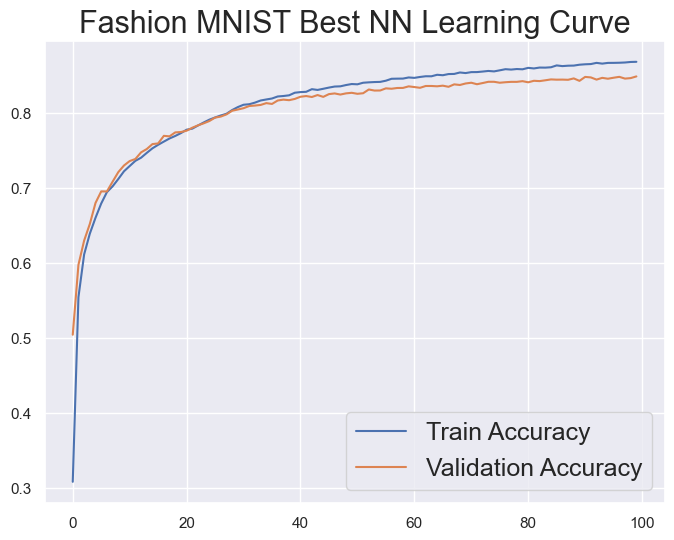

In [238]:
# lets evaluate and visualize

import matplotlib.pyplot as plt
%matplotlib inline 

fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Fashion MNIST Best NN Learning Curve', fontsize=22)
ax.plot(history.history['accuracy'], label='Train Accuracy')
ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax.legend(fontsize=18)
# ax.set_ylim([0, 1])
plt.show()

In [239]:
# classify images from the test set
start_time = time.time()

predictions = best_model.predict(X_test)

testing_time_dnn = time.time() - start_time

predictions[0]



313/313 [==============================] - 0s 436us/step


array([8.5697032e-04, 1.6515920e-03, 6.9587625e-04, 1.2888360e-03,
       1.4502089e-03, 5.2004404e-02, 2.9408099e-04, 1.8611071e-01,
       4.7314619e-03, 7.5091594e-01], dtype=float32)

In [240]:
# It's interesting to see the probabilities, but not really useful yet,
# so we will extract the index of the highest probability, which corresponds to the class
import numpy as np
predictions_classes = [np.argmax(p) for p in predictions]
predictions_classes[0]

9

In [ ]:
# accuracy
# It would take a while to hand-check all of them,
# so we will use accuracy_score from sklearn to calculate a model accuracy
from sklearn.metrics import accuracy_score
accuracy_dnn = accuracy_score(y_test, predictions_classes)
print('test accuracy with best model:')
print('{:.2%}'.format(accuracy_dnn))
# 82.45% with 25 epochs
# 83.72% with 100 epochs


test accuracy with best model:
83.72%


In [ ]:
# f1 score
from sklearn.metrics import f1_score
f1_dnn = f1_score(y_test, predictions_classes, average='weighted')
print('f1 score: {:.2%}'.format(f1_dnn))
# f1 score: 82.24% with 25 epochs
# f1 score: 83.53% with 100 epochs


f1 score: 83.53%


In [243]:
# confusion matrix
# We can also see how well individual labels are predicted with a confusion matrix
# column => predicted class
# row => true class

import pandas as pd
from sklearn.metrics import confusion_matrix
cm_dnn = confusion_matrix(y_test, predictions_classes)
# pd.DataFrame(cm, index=class_names, columns=class_names)
cm_dnn_df = pd.DataFrame(cm_dnn, index=class_names, columns=class_names)
cm_dnn_df


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,836,6,11,42,4,1,81,0,19,0
Trouser,2,949,11,31,3,0,2,0,2,0
Pullover,19,3,699,12,165,1,88,0,13,0
Dress,29,12,7,874,32,1,40,0,5,0
Coat,0,2,96,39,792,0,65,0,6,0
Sandal,1,0,0,1,0,896,0,50,8,44
Shirt,181,2,113,36,106,0,533,0,29,0
Sneaker,0,0,0,0,0,37,0,908,0,55
Bag,2,1,9,9,4,4,24,7,940,0
Ankle boot,0,0,0,1,0,9,0,43,2,945


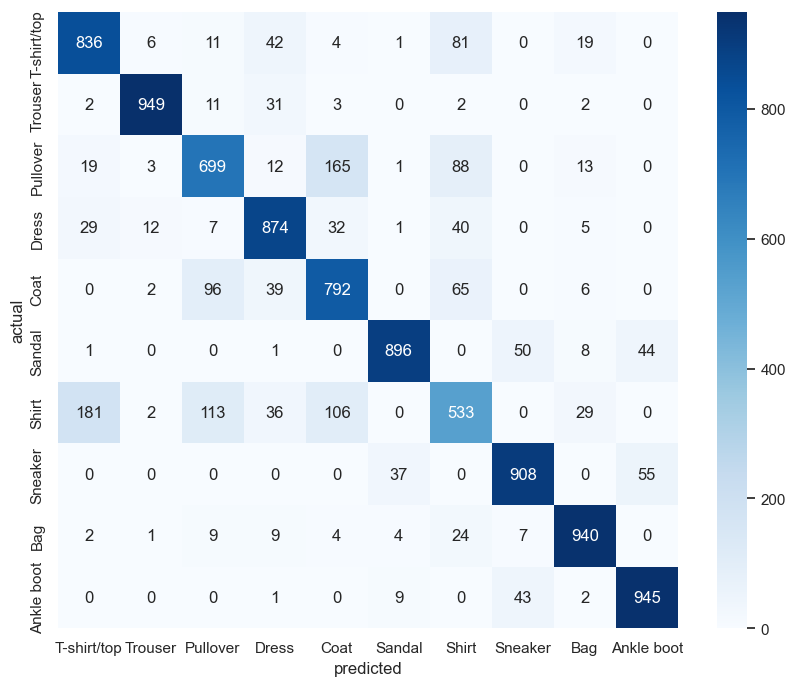

In [244]:
# lets visualize it
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dnn_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [283]:
# classification report
from sklearn.metrics import classification_report
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cr_dnn = classification_report(y_test, predictions_classes, target_names=class_names)

print(classification_report(y_test, predictions_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.84      0.81      1000
     Trouser       0.97      0.95      0.96      1000
    Pullover       0.74      0.70      0.72      1000
       Dress       0.84      0.87      0.85      1000
        Coat       0.72      0.79      0.75      1000
      Sandal       0.94      0.90      0.92      1000
       Shirt       0.64      0.53      0.58      1000
     Sneaker       0.90      0.91      0.90      1000
         Bag       0.92      0.94      0.93      1000
  Ankle boot       0.91      0.94      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [246]:
X_train[0].shape

(28, 28)

In [ ]:
# the number of learnable parameters
total_params_dnn = best_model.count_params()
print('total parameters:', total_params_dnn)
# total parameters: 118282


total parameters: 118282


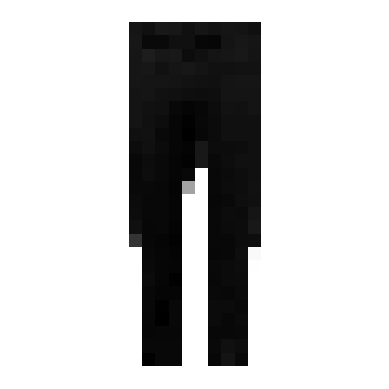

1/1 [==============================] - 0s 34ms/step
prediction class: Trouser


1

In [248]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

# img_path = 'tshirt-orange.jpeg'
# img_path = 'bag-hq.jpg'
# img_path = 'sandal.jpg'
# img_path = 'coat.jpg'
# img_path = 'coat-big.jpeg'
img_path = 'trouser.jpg'
# img_path = 'sneaker.jpeg'
# img_path = 'pullover.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = np.invert(img)

img = img/255.0

# match model input dimensions
some_image = img.reshape(28,28)

plt.imshow(some_image, cmap = plt.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()


result = best_model.predict(img.reshape(1, 28, 28)) #3 dimensions for sigmoid
# result = best_model.predict(img.reshape(1, 28, 28, 1)) #4 dimensions for relu: (batch_size, height, width, channels)
prediction_class_my_input = np.argmax(result)
result
print('prediction class:', class_names[prediction_class_my_input])
result = [np.argmax(p) for p in result]
result[0]

## Model 2: Convulutional Neural Network (CNN) - Variation 1

In [249]:
import tensorflow as tf

#If the data isn't already in keras/datasets it will download automatically 
# fashion_mnist = tf.keras.datasets.fashion_mnist
# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


#lets load the dataset manually
import numpy as np
def load_mnist_data(images_path, labels_path):
    with open(images_path, 'rb') as img_file, open(labels_path, 'rb') as lbl_file:
        images = np.frombuffer(img_file.read(), np.uint8, offset=16).reshape(-1, 28, 28)
        labels = np.frombuffer(lbl_file.read(), np.uint8, offset=8)
    return images, labels

dataset_dir = '/Users/sh/dev/datasets/fashion_mnist'

X_train, y_train = load_mnist_data(f"{dataset_dir}/train-images-idx3-ubyte",f"{dataset_dir}/train-labels-idx1-ubyte")
X_test, y_test = load_mnist_data(f"{dataset_dir}/t10k-images-idx3-ubyte",f"{dataset_dir}/t10k-labels-idx1-ubyte")


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

# reshape the data, include the channel dimension
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)


# normalize
X_train_cnn = X_train_cnn.astype('float32')/255.0
X_test_cnn = X_test_cnn.astype('float32')/255.0

def build_cnn_model():

    #get an instance of a Sequential Model
    model = Sequential()

    #add some layers to the model
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=10, activation='softmax'))
    
    #compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', #default is learning rate 0.001, beta_1 0.9 and beta_2 0.999
                  metrics=['accuracy'])

    return model

In [163]:
# one hot encoding
# We will use the Keras utility to_categorical to one hot encode the labels

from tensorflow.keras.utils import to_categorical
# help(to_categorical)
y_train = to_categorical(y_train)

#This is the label corresponding to index 77, the shirt
y_train[77]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [164]:
cnn_model = build_cnn_model()

In [165]:
cnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 5, 5, 64)        

In [166]:
print(X_train_cnn.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [34]:
# from tensorflow.keras.utils import plot_model
# plot_model(cnn_model, show_shapes=True)

In [ ]:
import time
start_time = time.time()

# history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=25, batch_size=50, validation_split=0.4, verbose=1)

history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=800, validation_split=0.2, verbose=1)
# 50 epochs, 500 batch takes 4.5 mins
# 100 epochs, 800 batch takes 8.2 mins

training_time_cnn = time.time() - start_time
training_time_cnn/60


Epoch 1/100
60/60 [==============================] - 5s 84ms/step - loss: 1.1110 - accuracy: 0.6011 - val_loss: 0.6125 - val_accuracy: 0.7697
Epoch 2/100
60/60 [==============================] - 5s 84ms/step - loss: 0.6454 - accuracy: 0.7597 - val_loss: 0.5198 - val_accuracy: 0.8015
Epoch 3/100
60/60 [==============================] - 5s 86ms/step - loss: 0.5633 - accuracy: 0.7903 - val_loss: 0.4585 - val_accuracy: 0.8273
Epoch 4/100
60/60 [==============================] - 5s 83ms/step - loss: 0.5192 - accuracy: 0.8097 - val_loss: 0.4370 - val_accuracy: 0.8405
Epoch 5/100
60/60 [==============================] - 5s 83ms/step - loss: 0.4834 - accuracy: 0.8222 - val_loss: 0.4015 - val_accuracy: 0.8545
Epoch 6/100
60/60 [==============================] - 5s 84ms/step - loss: 0.4543 - accuracy: 0.8371 - val_loss: 0.3791 - val_accuracy: 0.8632
Epoch 7/100
60/60 [==============================] - 5s 83ms/step - loss: 0.4318 - accuracy: 0.8450 - val_loss: 0.3618 - val_accuracy: 0.8690
Epoch 

8.217338701089224

## Model Evaluation

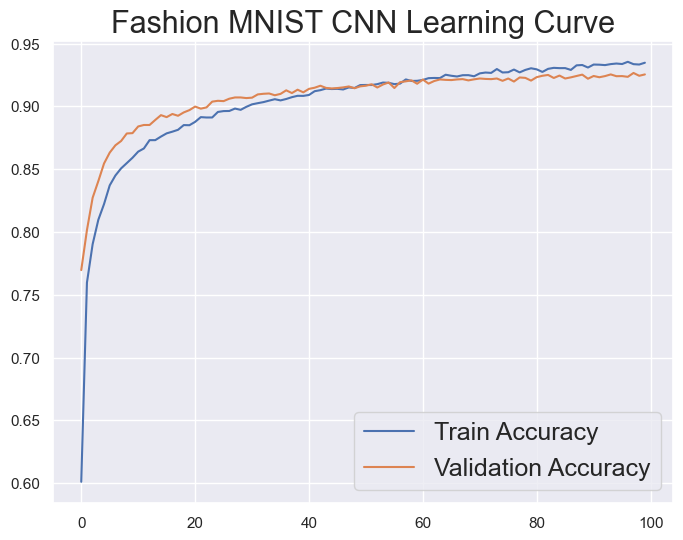

In [168]:
# lets evaluate and visualize

import matplotlib.pyplot as plt
%matplotlib inline 

fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Fashion MNIST CNN Learning Curve', fontsize=22)
ax.plot(history_cnn.history['accuracy'], label='Train Accuracy')
ax.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
ax.legend(fontsize=18)
# ax.set_ylim([0,1])
plt.show()

In [169]:
# classify images from the test set
start_time = time.time()

predictions_cnn = cnn_model.predict(X_test_cnn)

testing_time_cnn = time.time() - start_time

predictions_cnn[0]

313/313 [==============================] - 1s 3ms/step


array([2.0477085e-11, 1.1746839e-13, 7.3658641e-13, 4.0592335e-11,
       1.8806476e-17, 1.8062609e-07, 3.4797528e-13, 1.1894510e-06,
       1.7887694e-12, 9.9999869e-01], dtype=float32)

In [170]:
# It's interesting to see the probabilities, but not really useful yet,
# so we will extract the index of the highest probability, which corresponds to the class
import numpy as np
predictions_classes_cnn = [np.argmax(p) for p in predictions_cnn]
predictions_classes_cnn[0]

9

In [ ]:
# accuracy
# It would take a while to hand-check all of them,
# so we will use accuracy_score from sklearn to calculate a model accuracy
from sklearn.metrics import accuracy_score
accuracy_cnn = accuracy_score(y_test, predictions_classes_cnn)
print('test accuracy with cnn:')
print('{:.2%}'.format(accuracy_cnn))
# 88.43% with 10 epochs
# 91.53% with 50 epochs
# 91.99% with 100 epochs

test accuracy with cnn:
91.99%


In [ ]:
# f1 score
from sklearn.metrics import f1_score
f1_cnn = f1_score(y_test, predictions_classes_cnn, average='weighted')
print('f1 cnn score: {:.2%}'.format(f1_cnn))
# f1 cnn score: 89.49% with 10 epochs
# f1 cnn score: 91.52% with 50 epochs
# f1 cnn score: 91.99% with 100 epochs


f1 cnn score: 91.99%


In [173]:
# confusion matrix
# We can also see how well individual labels are predicted with a confusion matrix
# column => predicted class
# row => true class

import pandas as pd
from sklearn.metrics import confusion_matrix
cm_cnn = confusion_matrix(y_test, predictions_classes_cnn)
# pd.DataFrame(cm_cnn, index=class_names, columns=class_names)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
cm_cnn_df = pd.DataFrame(cm_cnn, columns=class_names)
cm_cnn_df




,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
0,858,0,19,16,3,1,98,0,5,0
1,1,980,1,13,1,0,2,0,2,0
2,12,0,912,8,28,0,39,0,1,0
3,11,3,12,926,20,0,27,0,1,0
4,2,1,44,26,867,0,60,0,0,0
5,0,0,0,0,0,979,0,13,1,7
6,97,0,69,19,49,0,762,0,4,0
7,0,0,0,0,0,6,0,981,0,13
8,1,0,5,5,2,2,4,1,979,1
9,1,0,0,0,0,4,0,40,0,955


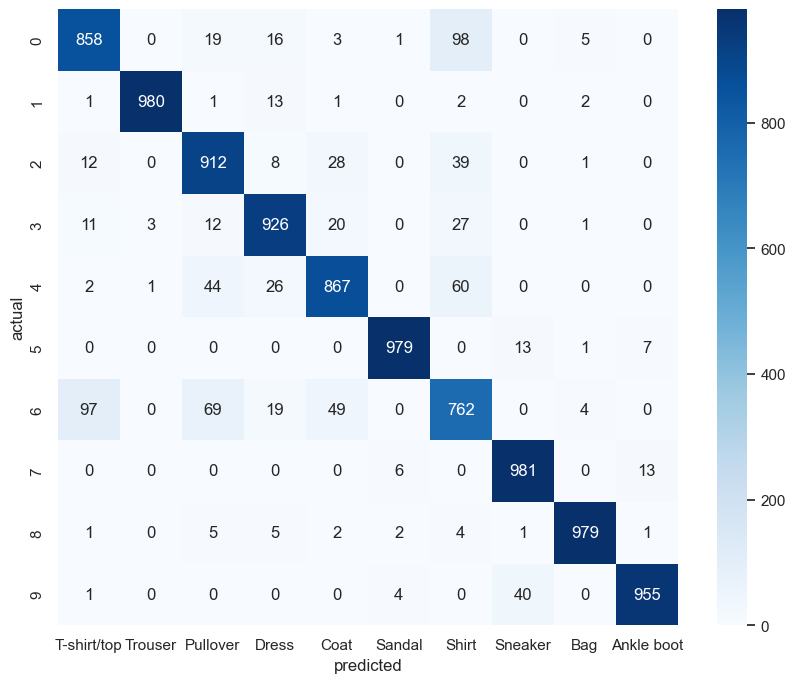

In [174]:
# lets visualize it
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [175]:
# classification report
from sklearn.metrics import classification_report
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(classification_report(y_test, predictions_classes_cnn, target_names=class_names))

cr_cnn = classification_report(y_test, predictions_classes_cnn, target_names=class_names)

print(cr_cnn)


              precision    recall  f1-score   support

 T-shirt/top       0.87      0.86      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.91      0.88      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.89      0.87      0.88      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.77      0.76      0.77      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.86      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.91      0.88      1000
       Dress       0.91 

In [176]:
X_train[0].shape

(28, 28)

In [ ]:
# the number of learnable parameters
cnn_total_params = cnn_model.count_params()
print('total parameters in CNN:', cnn_total_params)
# total parameters in CNN: 225034


total parameters in CNN: 225034


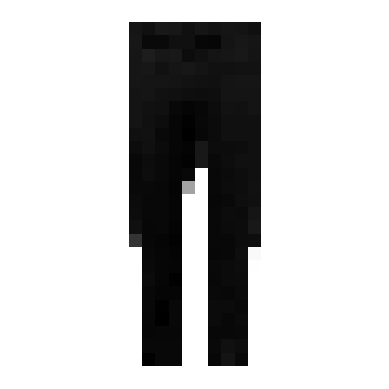

1/1 [==============================] - 0s 15ms/step
prediction class: Trouser


1

In [178]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

# img_path = 'tshirt-orange.jpeg'
# img_path = 'bag-hq.jpg'
# img_path = 'sandal.jpg'
# img_path = 'coat.jpg'
# img_path = 'coat-big.jpeg'
img_path = 'trouser.jpg'
# img_path = 'sneaker.jpeg'
# img_path = 'pullover.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = np.invert(img)

img = img/255.0

# match model input dimensions
some_image = img.reshape(28,28)

plt.imshow(some_image, cmap = plt.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()


# result = cnn_model.predict(img.reshape(1, 28, 28)) #3 dimensions for sigmoid
result = cnn_model.predict(img.reshape(1, 28, 28, 1)) #4 dimensions for relu: (batch_size, height, width, channels)
prediction_class_my_input = np.argmax(result)
result
print('prediction class:', class_names[prediction_class_my_input])
result = [np.argmax(p) for p in result]
result[0]

## Model 4: Convulutional Neural Network (CNN) - Variation 2

In [183]:
import tensorflow as tf

#If the data isn't already in keras/datasets it will download automatically 
# fashion_mnist = tf.keras.datasets.fashion_mnist
# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


#lets load the dataset manually
import numpy as np
def load_mnist_data(images_path, labels_path):
    with open(images_path, 'rb') as img_file, open(labels_path, 'rb') as lbl_file:
        images = np.frombuffer(img_file.read(), np.uint8, offset=16).reshape(-1, 28, 28)
        labels = np.frombuffer(lbl_file.read(), np.uint8, offset=8)
    return images, labels

dataset_dir = '/Users/sh/dev/datasets/fashion_mnist'

X_train, y_train = load_mnist_data(f"{dataset_dir}/train-images-idx3-ubyte",f"{dataset_dir}/train-labels-idx1-ubyte")
X_test, y_test = load_mnist_data(f"{dataset_dir}/t10k-images-idx3-ubyte",f"{dataset_dir}/t10k-labels-idx1-ubyte")


In [184]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Reshape
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

# reshape the data, include the channel dimension
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)


# normalize
X_train_cnn = X_train_cnn.astype('float32')/255.0
X_test_cnn = X_test_cnn.astype('float32')/255.0

def build_cnn_model2():

    #get an instance of a Sequential Model
    model = Sequential()

    #add some layers to the model
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=10, activation='softmax'))
    
    #compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999), #default is 0.001, 0.9 and 0.999
                  metrics=['accuracy'])

    return model

In [185]:
# one hot encoding
# We will use the Keras utility to_categorical to one hot encode the labels

from tensorflow.keras.utils import to_categorical
# help(to_categorical)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#This is the label corresponding to index 77, the shirt
y_train[77]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [186]:
cnn_model = build_cnn_model2()

In [187]:
cnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 5, 5, 64)        

In [188]:
print(X_train_cnn.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [128]:
# from tensorflow.keras.utils import plot_model
# plot_model(cnn_model, show_shapes=True)

In [ ]:
# # augmentation to apply random trasnformation for a better performance
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     shear_range=0.1,
#     horizontal_flip=False,
#     fill_mode='nearest'
# )


# datagen.fit(X_train_cnn)


In [ ]:
import time
start_time = time.time()

# history_cnn2 = cnn_model.fit(datagen.flow(X_train_cnn, y_train, batch_size=500), epochs=50, validation_data=(X_test_cnn, y_test))
# history_cnn2 = cnn_model.fit(datagen.flow(X_train_cnn, y_train, batch_size=500), epochs=25, validation_data=(X_test_cnn, y_test))


# # history_cnn2 = cnn_model.fit(X_train_cnn, y_train, epochs=25, batch_size=50, validation_split=0.4, verbose=1)
history_cnn2 = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=500, validation_split=0.2, verbose=1)

training_time_cnn2 = time.time() - start_time
training_time_cnn2/60

# time taken with 100 epochs, 500 batch is 8.4 mins


Epoch 1/100
96/96 [==============================] - 5s 53ms/step - loss: 0.4560 - accuracy: 0.8325 - val_loss: 0.3458 - val_accuracy: 0.8675
Epoch 2/100
96/96 [==============================] - 5s 54ms/step - loss: 0.4107 - accuracy: 0.8506 - val_loss: 0.3210 - val_accuracy: 0.8829
Epoch 3/100
96/96 [==============================] - 5s 56ms/step - loss: 0.3891 - accuracy: 0.8572 - val_loss: 0.3067 - val_accuracy: 0.8856
Epoch 4/100
96/96 [==============================] - 5s 53ms/step - loss: 0.3734 - accuracy: 0.8604 - val_loss: 0.3052 - val_accuracy: 0.8869
Epoch 5/100
96/96 [==============================] - 5s 55ms/step - loss: 0.3693 - accuracy: 0.8634 - val_loss: 0.3031 - val_accuracy: 0.8848
Epoch 6/100
96/96 [==============================] - 5s 53ms/step - loss: 0.3545 - accuracy: 0.8681 - val_loss: 0.2909 - val_accuracy: 0.8882
Epoch 7/100
96/96 [==============================] - 5s 54ms/step - loss: 0.3545 - accuracy: 0.8673 - val_loss: 0.3080 - val_accuracy: 0.8886
Epoch 

8.3979017496109

## Model Evaluation

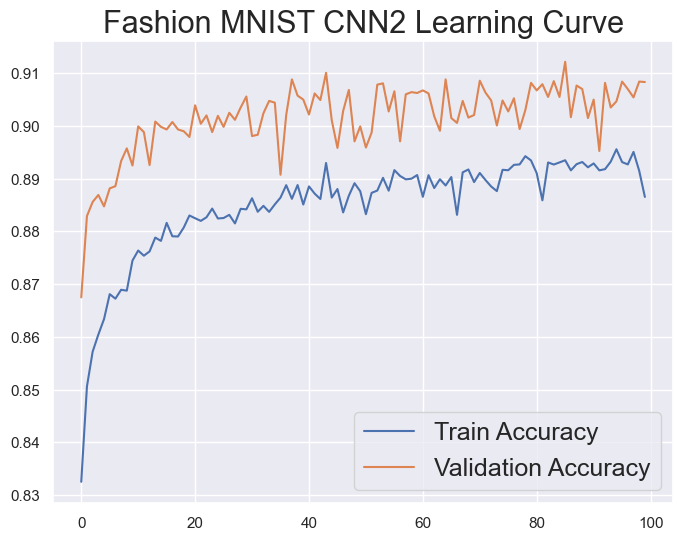

In [191]:
# lets evaluate and visualize

import matplotlib.pyplot as plt
%matplotlib inline 

fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Fashion MNIST CNN2 Learning Curve', fontsize=22)
ax.plot(history_cnn2.history['accuracy'], label='Train Accuracy')
ax.plot(history_cnn2.history['val_accuracy'], label='Validation Accuracy')
ax.legend(fontsize=18)
# ax.set_ylim([0,1])
plt.show()

In [192]:
# classify images from the test set
start_time = time.time()

predictions_cnn2 = cnn_model.predict(X_test_cnn)

testing_time_cnn2 = time.time() - start_time

predictions_cnn2[0]

313/313 [==============================] - 1s 2ms/step


array([2.7345505e-33, 4.9346331e-29, 9.5146070e-32, 3.6690949e-29,
       9.8187851e-36, 7.8431860e-08, 8.0410678e-32, 1.1827231e-06,
       1.8976945e-21, 9.9999869e-01], dtype=float32)

In [193]:
# It's interesting to see the probabilities, but not really useful yet,
# so we will extract the index of the highest probability, which corresponds to the class
import numpy as np
predictions_classes_cnn2 = [np.argmax(p) for p in predictions_cnn2]
predictions_classes_cnn2[0]
y_test_classes = np.argmax(y_test, axis=1)


In [ ]:
# accuracy
# It would take a while to hand-check all of them,
# so we will use accuracy_score from sklearn to calculate a model accuracy
from sklearn.metrics import accuracy_score
accuracy_cnn2 = accuracy_score(y_test_classes, predictions_classes_cnn2)
print('test accuracy with cnn2:')
print('{:.2%}'.format(accuracy_cnn2))
# 82.95% with data augmentation (10 epochs)
# 88.67% without data augmentation (10 epochs)
# 89.06% (25 epochs)
# 90.06% (100 epochs)

test accuracy with cnn2:
90.06%


In [ ]:
# f1 score
from sklearn.metrics import f1_score
f1_cnn2 = f1_score(y_test_classes, predictions_classes_cnn2, average='weighted')
print('f1 cnn2 score: {:.2%}'.format(f1_cnn2))
# f1 cnn score: 81.87% with data augmentation
# f1 cnn2 score: 88.75% without data augmentation
# f1 cnn2 score: 89.01% (25 epochs)
# f1 cnn2 score: 90.09% (100 epochs)



f1 cnn2 score: 90.09%


In [197]:
# confusion matrix
# We can also see how well individual labels are predicted with a confusion matrix
# column => predicted class
# row => true class

import pandas as pd
from sklearn.metrics import confusion_matrix
cm_cnn2 = confusion_matrix(y_test_classes, predictions_classes_cnn2)
# pd.DataFrame(cm_cnn2, index=class_names, columns=class_names)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
cm_cnn_df2 = pd.DataFrame(cm_cnn2, columns=class_names)
cm_cnn_df2




,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
0,850,1,16,14,6,1,109,0,3,0
1,3,973,3,12,4,0,4,0,1,0
2,18,0,828,10,84,0,60,0,0,0
3,17,5,7,903,26,0,42,0,0,0
4,2,0,27,30,867,0,73,0,1,0
5,0,0,0,0,0,969,0,24,0,7
6,122,0,73,21,81,0,698,0,5,0
7,0,0,0,0,0,0,0,990,0,10
8,3,0,2,4,5,1,6,2,977,0
9,0,0,0,0,0,4,1,44,0,951


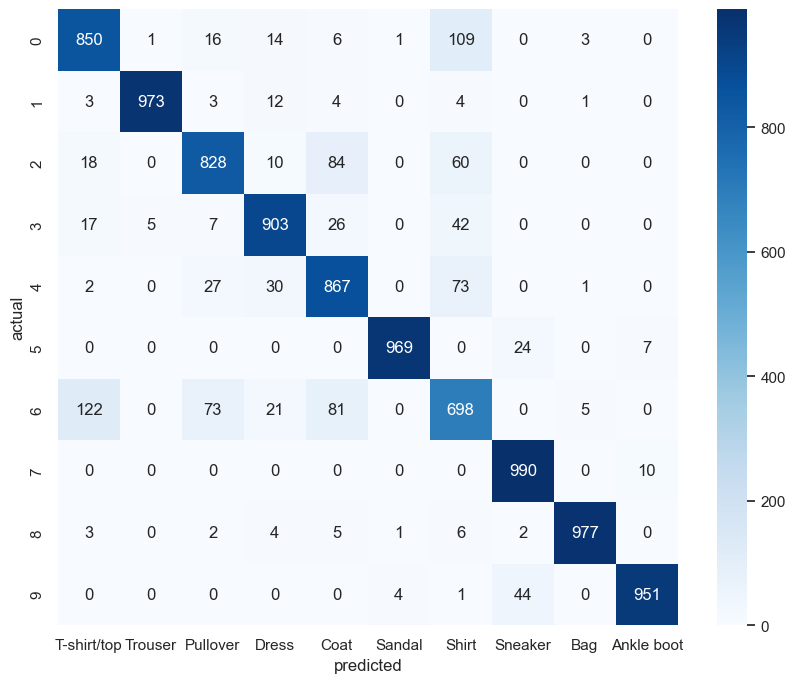

In [199]:
# lets visualize it
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn_df2, annot=True, fmt='d', cmap='Blues')
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [200]:
# classification report
from sklearn.metrics import classification_report
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(classification_report(y_test_classes, predictions_classes_cnn2, target_names=class_names))

cr_cnn2 = classification_report(y_test_classes, predictions_classes_cnn2, target_names=class_names)

print(cr_cnn2)


              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.83      0.85      1000
       Dress       0.91      0.90      0.91      1000
        Coat       0.81      0.87      0.84      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.70      0.70      0.70      1000
     Sneaker       0.93      0.99      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.83      0.85      1000
       Dress       0.91 

In [201]:
X_train[0].shape

(28, 28)

In [202]:
# the number of learnable parameters
cnn_total_params2 = cnn_model.count_params()
print('total parameters in CNN2:', cnn_total_params2)
# total parameters in CNN2: 225034


total parameters in CNN2: 225034


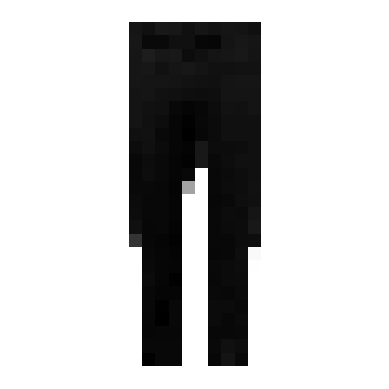

1/1 [==============================] - 0s 13ms/step
prediction class: Trouser


1

In [210]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

# img_path = 'tshirt-orange.jpeg'
# img_path = 'bag-hq.jpg'
# img_path = 'sandal.jpg'
# img_path = 'coat.jpg'
# img_path = 'coat-big.jpeg'
img_path = 'trouser.jpg'
# img_path = 'sneaker.jpeg'
# img_path = 'pullover.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = np.invert(img)

img = img/255.0

# match model input dimensions
some_image = img.reshape(28,28)

plt.imshow(some_image, cmap = plt.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()


# result = cnn_model.predict(img.reshape(1, 28, 28)) #3 dimensions for sigmoid
result = cnn_model.predict(img.reshape(1, 28, 28, 1)) #4 dimensions for relu: (batch_size, height, width, channels)
prediction_class_my_input = np.argmax(result)
result
print('prediction class:', class_names[prediction_class_my_input])
result = [np.argmax(p) for p in result]
result[0]

## Model 3: Logistic Regression

In [250]:

#If the data isn't already in keras/datasets it will download automatically 
# fashion_mnist = tf.keras.datasets.fashion_mnist
# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


#lets load the dataset manually
import numpy as np
def load_mnist_data(images_path, labels_path):
    with open(images_path, 'rb') as img_file, open(labels_path, 'rb') as lbl_file:
        images = np.frombuffer(img_file.read(), np.uint8, offset=16).reshape(-1, 28, 28)
        labels = np.frombuffer(lbl_file.read(), np.uint8, offset=8)
    return images, labels

dataset_dir = '/Users/sh/dev/datasets/fashion_mnist'


X_train, y_train = load_mnist_data(f"{dataset_dir}/train-images-idx3-ubyte",f"{dataset_dir}/train-labels-idx1-ubyte")
X_test, y_test = load_mnist_data(f"{dataset_dir}/t10k-images-idx3-ubyte",f"{dataset_dir}/t10k-labels-idx1-ubyte")


In [251]:
# flatten
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

print(X_train_flat.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [252]:
#lets train on only a subset to enhance performance

size = 30000
X_train_subset = X_train_flat[:size]
y_train_subset = y_train[:size]

print(X_train_subset.shape)
print(y_train_subset.shape)

(30000, 784)
(30000,)


In [253]:
# reduce components by pca

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_subset)
X_test_pca = pca.transform(X_test_flat)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_train_pca,y_train_subset,test_size=0.2,random_state=1)

print(X_train_lr.shape)
print(X_val_lr.shape)
print(y_train_lr.shape)
print(y_val_lr.shape)

lr = LogisticRegression(max_iter=100, verbose=1, random_state=1)

import time
start_time = time.time()

lr.fit(X_train_lr, y_train_lr)

training_time_lr = time.time() - start_time

# 10k iterations took 8 mins on a Google colab server for full dataset

(24000, 50)
(6000, 50)
(24000,)
(6000,)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          510     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  1.49647D+02


 This problem is unconstrained.



At iterate   50    f=  4.66010D-01    |proj g|=  2.02607D+00

At iterate  100    f=  4.59243D-01    |proj g|=  1.71128D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  510    100    109      1     0     0   1.711D+00   4.592D-01
  F =  0.45924306260638087     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Applications/Miniconda/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [255]:
# predict

start_time = time.time()

y_val_pred = lr.predict(X_val_lr)

testing_time_lr = time.time() - start_time

In [ ]:
# accuracy
accuracy_lr = accuracy_score(y_val_lr, y_val_pred)
print("accuracy:")
print('{:.2%}'.format(accuracy_lr))

# accuracy: 83% with pca n=50 and partial dataset size of = 30000
# accuracy: ~84% with pca n=0.9 and full dataset


accuracy:
83.00%


In [257]:
# f1 score
from sklearn.metrics import f1_score
f1_lr = f1_score(y_val_lr, y_val_pred, average='weighted')
print('f1 score: {:.2%}'.format(f1_lr))
# f1 score: 82.89%



f1 score: 82.89%


In [258]:
# confusion matrix
# We can also see how well individual labels are predicted with a confusion matrix
# column => predicted class
# row => true class

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


import pandas as pd
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_val_lr, y_val_pred)
cm_lr_df = pd.DataFrame(cm_lr, columns=class_names)

cm_lr_df


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
0,471,1,7,34,1,1,65,0,9,0
1,3,592,2,16,1,0,2,0,0,0
2,8,1,404,7,81,4,57,0,6,1
3,20,14,3,494,20,0,31,1,2,0
4,3,3,66,20,456,2,58,0,6,0
5,0,1,0,0,0,564,2,29,7,13
6,91,0,66,29,70,0,330,0,19,0
7,0,0,0,0,0,35,0,533,2,24
8,0,0,4,7,1,7,17,2,573,0
9,0,0,0,0,0,10,0,28,0,563


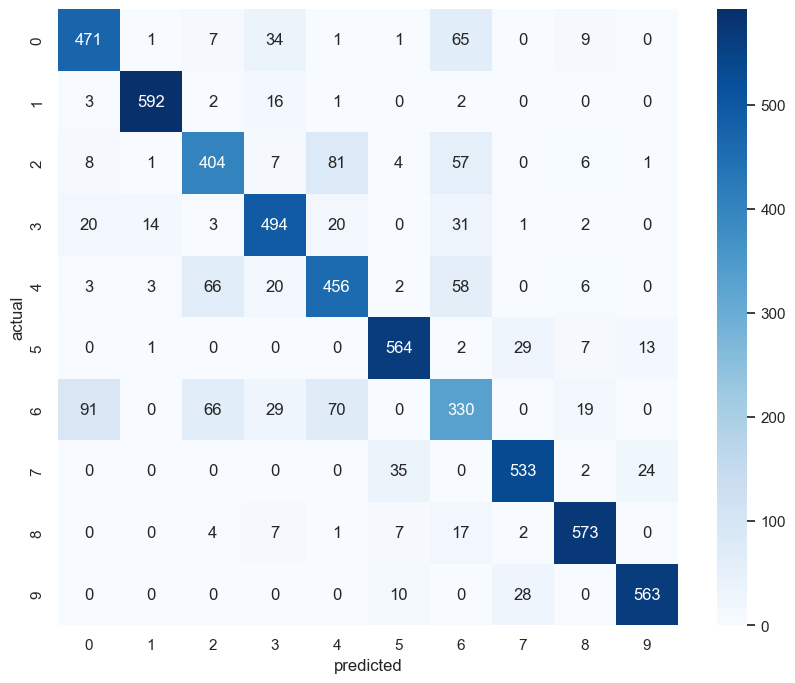

In [259]:
# lets visualize it
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [260]:
# classification report

cr_lr = classification_report(y_val_lr, y_val_pred,target_names=class_names)

print(cr_lr)


              precision    recall  f1-score   support

 T-shirt/top       0.79      0.80      0.79       589
     Trouser       0.97      0.96      0.96       616
    Pullover       0.73      0.71      0.72       569
       Dress       0.81      0.84      0.83       585
        Coat       0.72      0.74      0.73       614
      Sandal       0.91      0.92      0.91       616
       Shirt       0.59      0.55      0.57       605
     Sneaker       0.90      0.90      0.90       594
         Bag       0.92      0.94      0.93       611
  Ankle boot       0.94      0.94      0.94       601

    accuracy                           0.83      6000
   macro avg       0.83      0.83      0.83      6000
weighted avg       0.83      0.83      0.83      6000



In [261]:
coefficients = lr.coef_
intercepts = lr.intercept_

n_features = coefficients.shape[1]
# print(n_features) #pca=50

n_classes = coefficients.shape[0]
# print(n_classes) #classes=10

n_coefficients = coefficients.size
# print(n_coefficients) #n_features * n_classes = 500

n_intercepts = intercepts.size
# print(n_intercepts)#classes=10

params_lr = n_coefficients + n_intercepts
print(params_lr)


510


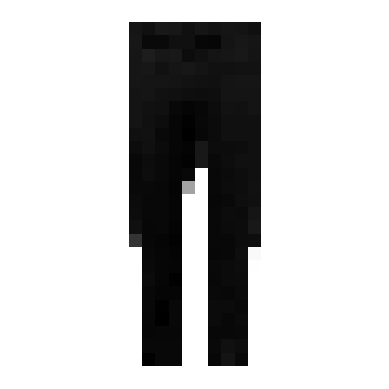

Sandal

[0.10874077 0.0091522  0.03958314 0.11299203 0.0078783  0.59223482
 0.0849175  0.0302854  0.01344772 0.00076811]


In [262]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt
import numpy as np


# img_path = 'tshirt-orange.jpeg'
# img_path = 'bag-hq.jpg'
# img_path = 'sandal.jpg'
# img_path = 'coat.jpg'
# img_path = 'coat-big.jpeg'
img_path = 'trouser.jpg'
# img_path = 'sneaker.jpeg'
# img_path = 'pullover.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = np.invert(img)

img = img/255.0

# match model input dimensions
img_flat = img.reshape(1, -1)
img_pca = pca.transform(img_flat)

# predict
lr_prediction = lr.predict(img_pca)
lr_prediction_prob = lr.predict_proba(img_pca)


predicted_class = class_names[lr_prediction[0]]
predicted_probability = lr_prediction_prob[0]


plt.imshow(img, cmap = plt.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

print(predicted_class)
print()
print(predicted_probability)



## Model 4: Support Vector Machine (SVM)

In [263]:

#If the data isn't already in keras/datasets it will download automatically 
# fashion_mnist = tf.keras.datasets.fashion_mnist
# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


#lets load the dataset manually
import numpy as np
def load_mnist_data(images_path, labels_path):
    with open(images_path, 'rb') as img_file, open(labels_path, 'rb') as lbl_file:
        images = np.frombuffer(img_file.read(), np.uint8, offset=16).reshape(-1, 28, 28)
        labels = np.frombuffer(lbl_file.read(), np.uint8, offset=8)
    return images, labels

dataset_dir = '/Users/sh/dev/datasets/fashion_mnist'


X_train, y_train = load_mnist_data(f"{dataset_dir}/train-images-idx3-ubyte",f"{dataset_dir}/train-labels-idx1-ubyte")
X_test, y_test = load_mnist_data(f"{dataset_dir}/t10k-images-idx3-ubyte",f"{dataset_dir}/t10k-labels-idx1-ubyte")


In [264]:
# flatten
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

print(X_train_flat.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [265]:
#lets train on only a subset to enhance performance

size = 150
X_train_subset = X_train_flat[:size]
y_train_subset = y_train[:size]

print(X_train_subset.shape)
print(y_train_subset.shape)

(150, 784)
(150,)


In [266]:
# reduce components by pca

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_subset)
X_test_pca = pca.transform(X_test_flat)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)

import time
start_time = time.time()


svm.fit(X_train_pca, y_train_subset)


training_time_svm = time.time() - start_time

training_time_svm/60

# takes around 1 min with data subset and linear kernel with pca n = 5
# takes around 6.2 min with full dataset and polynomial kernel with pca n = 0.9

0.9203905820846557

In [ ]:
start_time = time.time()

svm_predict = svm.predict(X_test_pca)

testing_time_svm = time.time() - start_time

testing_time_svm/60

0.00025116602579752605

## Model Evaluation

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, svm_predict)
print('test accuracy with svm:')
print('{:.2%}'.format(accuracy_svm))
# accuracy: 63.48% with pca n = 50 for linear kernel and partial dataset of 150 (but took around a minute to train locally)
# accuracy: 87.34% with pca n=0.9 for polynomial kernel and full dataset (but took around 6.2mins to train on a more powerful Google colab server)

test accuracy with svm:
63.19%


In [ ]:
# lets evaluate
import numpy as np
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(svm, X_train_pca, y_train_subset, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, shuffle=True, random_state=1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)

# takes around 1.5 mins with data subset and linear kernel
# could take around 3.5 days (85 hours) with full dataset and polynomial kernel



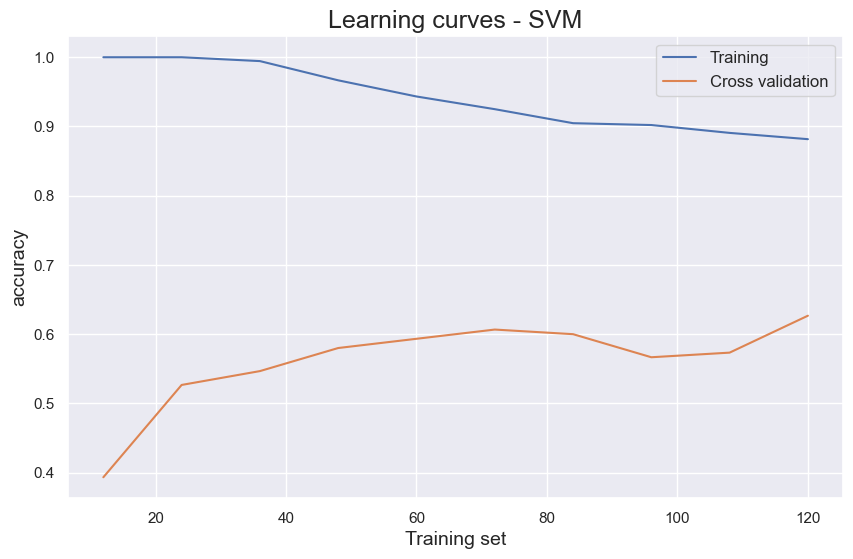

In [280]:

# visualize
import matplotlib.pyplot as plt
%matplotlib inline 


plt.figure(figsize=(10, 6))
plt.title('Learning curves - SVM', fontsize=18)

plt.plot(train_sizes, train_scores_mean, label='Training')
plt.plot(train_sizes, test_scores_mean, label='Cross validation')

plt.xlabel('Training set', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# f1 score
from sklearn.metrics import f1_score
f1_svm = f1_score(y_test, svm_predict, average='weighted')
print('f1 svm score: {:.2%}'.format(f1_svm))
# f1 svm score: 62.63% with data subset and linear kernel
# f1 svm score: 87.45% with full dataset and polynomial kernel


f1 svm score: 62.63%


In [286]:
# confusion matrix
# We can also see how well individual labels are predicted with a confusion matrix
# column => predicted class
# row => true class

# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import seaborn as sns
# from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, svm_predict)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
cm_svm_df = pd.DataFrame(cm_svm, columns=class_names)
cm_svm_df



,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
0,690,6,9,70,47,8,151,0,19,0
1,38,730,12,191,10,1,17,0,1,0
2,24,0,633,5,113,0,220,0,5,0
3,235,106,2,545,32,1,77,0,2,0
4,103,6,486,28,135,2,234,0,6,0
5,0,0,2,0,11,749,0,123,15,100
6,235,4,289,29,100,6,313,0,24,0
7,0,0,0,0,0,61,0,797,3,139
8,15,1,19,0,67,50,6,5,833,4
9,3,0,1,5,18,41,0,30,8,894


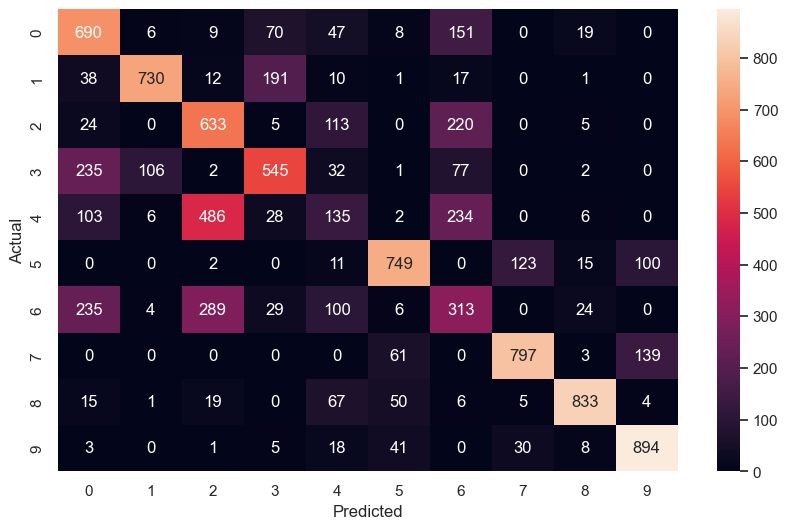

In [287]:

plt.figure(figsize=(10,6))
# plt.subplot(figsize=(10,6))
sns.heatmap(cm_svm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [275]:
# classification report
from sklearn.metrics import classification_report
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cr_svm = classification_report(y_test, svm_predict, target_names=class_names)
print(cr_svm)


              precision    recall  f1-score   support

 T-shirt/top       0.51      0.69      0.59      1000
     Trouser       0.86      0.73      0.79      1000
    Pullover       0.44      0.63      0.52      1000
       Dress       0.62      0.55      0.58      1000
        Coat       0.25      0.14      0.18      1000
      Sandal       0.82      0.75      0.78      1000
       Shirt       0.31      0.31      0.31      1000
     Sneaker       0.83      0.80      0.82      1000
         Bag       0.91      0.83      0.87      1000
  Ankle boot       0.79      0.89      0.84      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



In [276]:
X_train_pca[0].shape

(5,)

In [277]:
coefficients = svm.coef_
intercepts = svm.intercept_

n_features = coefficients.shape[1]
# print(n_features) #pca=5

n_classes = coefficients.shape[0]
# print(n_classes) #classes=45

n_coefficients = coefficients.size
# print(n_coefficients) #n_features * n_classes = 225

n_intercepts = intercepts.size
# print(n_intercepts)#classes=45

params_svm = n_coefficients + n_intercepts
print(params_svm)


270


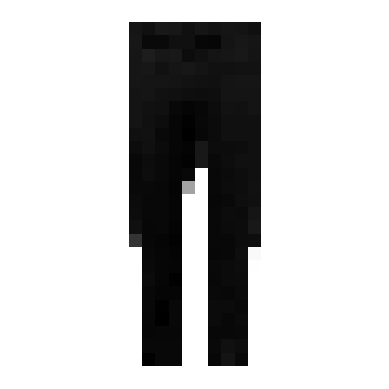

Sandal

[0.06538655 0.02122199 0.06853606 0.02662948 0.05667321 0.46041301
 0.12227819 0.12701528 0.03842497 0.01342126]


In [288]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt
import numpy as np


# img_path = 'tshirt-orange.jpeg'
# img_path = 'bag-hq.jpg'
# img_path = 'sandal.jpg'
# img_path = 'coat.jpg'
# img_path = 'coat-big.jpeg'
img_path = 'trouser.jpg'
# img_path = 'sneaker.jpeg'
# img_path = 'pullover.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = np.invert(img)

img = img/255.0

# match model input dimensions
img_flat = img.reshape(-1)
img_pca = pca.transform([img_flat])

# predict
svm_prediction = svm.predict(img_pca)
svm_prediction_prob = svm.predict_proba(img_pca)


predicted_class = class_names[svm_prediction[0]]
predicted_probability = svm_prediction_prob[0]


plt.imshow(img, cmap = plt.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

print(predicted_class)
print()
print(predicted_probability)



In [289]:
# comparison between models


models = ['DNN', 'CNN', 'Logistic Regression', 'SVM']

model_metrics = [
    {
        'model': 'DNN',
        'acc': accuracy_dnn * 100,
        'f1': f1_dnn * 100,
        'training_time': training_time_dnn,
        'test_time': testing_time_dnn,
        'parameters': total_params_dnn
    },
    {
        'model': 'CNN',
        'acc': accuracy_cnn * 100,
        'f1': f1_cnn * 100,
        'training_time': training_time_cnn,
        'test_time': testing_time_cnn,
        'parameters': cnn_total_params
    },
    {
        'model': 'CNN2',
        'acc': accuracy_cnn2 * 100,
        'f1': f1_cnn2 * 100,
        'training_time': training_time_cnn2,
        'test_time': testing_time_cnn2,
        'parameters': cnn_total_params2
    },
    {
        'model': 'Logistic Regression',
        'acc': accuracy_lr * 100,
        'f1': f1_lr * 100,
        'training_time': training_time_lr,
        'test_time': testing_time_lr,
        'parameters': params_lr
    },
    {
        'model': 'SVM',
        'acc': accuracy_svm * 100,
        'f1': f1_svm * 100,
        'training_time': training_time_svm,
        'test_time': testing_time_svm,
        'parameters': params_svm
    }
]

df_compare = pd.DataFrame(model_metrics)
print(df_compare)

print()

print("GridSearch to find the best model for the DNN took:")
print('{:.2f} seconds'.format(grid_search_time_dnn))


                 model    acc         f1  training_time  test_time  parameters
0                  DNN  83.72  83.529432      25.761089   0.234370      118282
1                  CNN  91.99  91.992172     493.040322   0.935688      225034
2                 CNN2  90.06  90.085471     503.874105   0.845122      225034
3  Logistic Regression  83.00  82.894679       0.878435   0.002564         510
4                  SVM  63.19  62.634571      55.223435   0.015070         270

GridSearch to find the best model for the DNN took:
569.13 seconds
